In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("Churn_Modeling Dataset.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#!pip install tensorflow
#!pip show tensorflow
print(tf.__version__)

2.15.0


In [6]:
df.shape

(10000, 14)

In [7]:
#dividing the dataset into dependent and independent features.
X= df.iloc[:,3:-1]
y=df.iloc[:,13:15]


In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [10]:
#Feature Engineering 
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X["Gender"],drop_first=True)

In [11]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [12]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [13]:
X = X.drop(["Geography","Gender"], axis=1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
X=pd.concat([X, geography, gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0, test_size=0.2)

In [17]:
X_train.shape, y_train.shape

((8000, 11), (8000, 1))

In [18]:
X_test.shape, y_test.shape

((2000, 11), (2000, 1))

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= pd.DataFrame(scaler.fit_transform(X_train))
X_test= pd.DataFrame(scaler.transform(X_test))

In [20]:
X_train

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,-0.569844,1.743090,-1.091687


In [21]:
X_test

,0,1,2,3,4,5,6,7,8,9,10
0,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,1.754865,-0.573694,-1.091687
1,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,-0.569844,-0.573694,-1.091687
2,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,-0.569844,1.743090,-1.091687
3,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,-0.569844,-0.573694,0.916013
4,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,1.754865,-0.573694,0.916013
...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.263393,-1.421650,-1.377440,-1.215717,0.809503,0.642595,0.968738,1.404319,-0.569844,-0.573694,-1.091687
1996,-0.665441,-0.368904,0.698712,-1.215717,0.809503,0.642595,-1.032270,-0.511196,-0.569844,-0.573694,-1.091687
1997,-0.747912,-0.273200,-1.377440,1.297455,0.809503,0.642595,-1.032270,0.718885,-0.569844,1.743090,0.916013
1998,-0.005670,-0.464608,-0.339364,1.059752,-0.921591,0.642595,0.968738,-1.545078,1.754865,-0.573694,0.916013


In [22]:
#Now let's create ANN.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, PReLU, ELU, LeakyReLU
from tensorflow.keras.layers import Dropout

In [24]:
classifier= Sequential()

In [25]:
#adding the input layer.
classifier.add(Dense(units=11,activation="relu"))  
classifier.add(Dropout(0.3)) #adding Dropout in this layer.
#we are specifying the input layer which has 11 input features and the activation function for the next layer which is ReLU.

In [26]:
#adding the first hidden layers.
classifier.add(Dense(units=7, activation="relu"))

In [27]:
#adding the second hidden layers.
classifier.add(Dense(units=6,activation="relu"))

In [28]:
#adding the output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [29]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]) 
#adam basically uses the learning rate as 0.01.

In [30]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.05)  
#but we can also change the learning rate to other values by this way.

In [31]:
#early stopping: when the model stop getting better accuracy then it will stop at that EPOCH.
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=-0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None)

In [32]:
#traing the model.
model_history= classifier.fit(X_train,y_train, validation_split=0.33,batch_size=10,epochs=100, callbacks=early_stopping)

Epoch 1/100


536/536 [==============================] - 2s 2ms/step - loss: 0.5268 - accuracy: 0.7848 - val_loss: 0.4558 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4576 - accuracy: 0.7962 - val_loss: 0.4361 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4428 - accuracy: 0.7975 - val_loss: 0.4232 - val_accuracy: 0.7970
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.8067 - val_loss: 0.4132 - val_accuracy: 0.8160
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.8102 - val_loss: 0.4082 - val_accuracy: 0.8198
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4177 - accuracy: 0.8143 - val_loss: 0.4047 - val_accuracy: 0.8220
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4172 - accuracy: 0.8151 - val_loss: 0.4016 - val_accuracy: 0.82

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

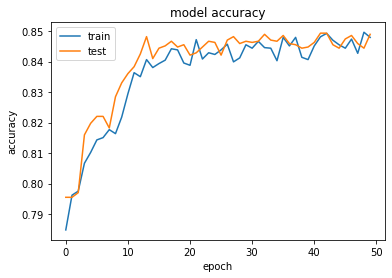

In [34]:
#summarize history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()



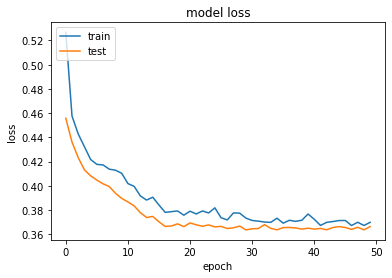

In [35]:
#summarize history for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [36]:
#Making the predictions over the test data. 
y_pred= classifier.predict(X_test)
y_pred = (y_pred>=0.5)
y_pred

63/63 [==============================] - 0s 887us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [37]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1531,   64],
       [ 211,  194]], dtype=int64)

In [38]:
#calculate the accuracy 
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8625

In [39]:
#get the weights
classifier.get_weights()

[array([[-7.23905861e-02,  8.68341252e-02,  1.41353622e-01,
          1.37651950e-01,  1.32076755e-01,  6.37276173e-02,
         -5.53510152e-02, -3.57440636e-02, -1.05817085e-02,
          4.66164351e-02,  9.72880349e-02],
        [-1.20194638e+00,  2.45642185e-01,  3.53366137e-02,
         -8.96387458e-01, -8.66880640e-02, -4.38687593e-01,
          3.49128723e-01, -1.22817615e-02,  1.70433894e-01,
         -9.42778528e-01, -1.35076797e+00],
        [-3.47831808e-02,  1.43693998e-01,  1.25087798e-01,
         -4.89850752e-02,  1.55074820e-01,  4.08422261e-01,
         -3.15764770e-02, -2.98844576e-02, -1.05592888e-02,
         -2.84367893e-03, -1.80683136e-01],
        [-1.79231405e-01, -4.49371368e-01, -5.17086506e-01,
         -6.46094605e-02, -4.14073080e-01, -1.10596023e-01,
         -3.68317991e-01, -5.93901038e-01,  1.96540073e-01,
         -2.83983439e-01,  3.15022841e-02],
        [ 7.92605206e-02,  5.36327250e-02,  9.08359811e-02,
          3.36017646e-02, -3.12344525e-02,  

In [41]:
#Black box model vs whitebox model.
"""
Random Forest= Black Box model
Decision Tree= white Box model
ANN, CNN, RNN = Black Box Model
Xgboost= Black Box model 
Linear Regression = White Box model
"""

"""white box = we can monitor all the weights of the model and seen how it is working internally . 
black box = we cannot monitor all the weights of the model and we cannot see directly how it is working internally."""

'white box = we can monitor all the weights of the model. \nblack box = we cannot monitor all the weights of the model and we cannot see directly how it is working internally.'